In [12]:
import pandas as pd
import numpy as np
import math
import time
import matplotlib.pyplot as plt

In [2]:
Train_data = pd.read_csv(r'C:\Users\miriy\Downloads\heart_train.data',header = None)
Test_data = pd.read_csv(r'C:\Users\miriy\Downloads\heart_test.data',header = None)

In [3]:
Train_data.loc[Train_data[0] == 0, 0] = -1
Test_data.loc[Test_data[0] == 0, 0] = -1

In [4]:
attrs = len(Train_data.columns)  #No of Attributes

rows = len(Train_data)

In [5]:
Train_data = np.array(Train_data.iloc[:,:])
Test_data = np.array(Test_data.iloc[:,:])

In [6]:
def output(tree, lst):
    while(True):
        for key, value in tree.items():
            #print('key', key)
            #print('value', value)
            if value == 1 or value == -1:
                return value
            else:
                k = lst[key]
                tree = tree[key][k]
            if tree == 1 or tree == -1:
                return tree

In [ ]:
def accur(data, rounds, alpha, hypo):#Accuracy Calculation for a given data, Number of Rounds, Alpha and 
    accuracy = 0                     #Hypothesis space
    length = len(data)
    for i in range(length):
        p = 0
        row = data[i, :]
        y = row[0]
        for r in range(rounds):
            k = output(hypo[r], row)
            p = p + alpha[r] * k
        if p >= 0:
            if y == 1:
                accuracy += 1
        else:
            if y == -1:
                accuracy += 1
    accuracy = accuracy/length * 100
    return accuracy

In [7]:
def AdaBoost(rounds, model, data):
    test = Test_data
    weightedError = 1
    weight = [1/rows]*rows #Initial weight matrix
    alpha = []
    HSpace = [] #Total hypothesis space
    predictions = []
    Train_accuracies = []
    Test_accuracies = []
    eps = []    #Weighted errors
    for r in range(rounds):
        t1 = time.time()
        print('round',r+1)
        weightedError = 1
        for mod in model:
            w = 0
            lst = []
            for i in range(rows):
                row = data[i, :]
                k = output(mod, row)
                lst.append(k)
                if row[0] != k:
                    w = w + weight[i]
                if w > weightedError or w > 0.51:#Optimization
                    break
            if w < weightedError:
                weightedError = w
                bTree = mod #bTree indicates it is a best tree
                bestP = lst
        HSpace.append(bTree)
        eps.append(weightedError)
        t = 1/2 * math.log((1-weightedError)/weightedError)
        alpha.append(t)
        #Train and Test Accuracy Calculation
        acc1 = accur(data, r+1, alpha, HSpace)
        acc2 = accur(test, r+1, alpha, HSpace)
        Train_accuracies.append(acc1)
        Test_accuracies.append(acc2)
        #Weight Updation
        sum1 = 0
        predictions.append(bestP)
        for i in range(rows):
            prediction = bestP[i]
            actual = data[i, 0]
            #print(prediction, actual)
            weight[i] = (weight[i] * (np.exp(-1 * prediction * actual * t)))/(2*np.sqrt(weightedError * (1-weightedError)))
            sum1 += weight[i]
        #print(weight)
        #print(alpha)
        print(weightedError) 
        t2 = time.time()
        print('round', r+1, 'end')
        print(t2-t1, 'secs')                      
    return eps, alpha, HSpace, predictions, Train_accuracies, Test_accuracies

In [8]:
def Hypothesis():
    hypo = []
    lst = [1, -1]
    for i in range(1, attrs):#attribute iteration
        for j in range(1, attrs):
#             for k in range(1, attrs):#5 different cases for 3 attribute splits
#         for a in lst:
            for a in lst:
                for b in lst:
                    for c in lst:
                        tree = {}                #case 1 LL
                        tree[i] = {}
                        tree[i][1] = a
                        tree1 = {}
                        tree1[j] = {}
                        tree1[j][0] = b
                        tree1[j][1] = c
                        tree[i][0] = tree1
                        hypo.append(tree)
                        
                        tree = {}                #case 2 LR
                        tree[i] = {}
                        tree[i][0] = a
                        tree1 = {}
                        tree1[j] = {}
                        tree1[j][0] = b
                        tree1[j][1] = c
                        tree[i][1] = tree1
                        hypo.append(tree)
                         
    return hypo

In [10]:
data = Train_data
rounds = 10
print('starting time')
t1 = time.time()
Thypo = Hypothesis()   #Thypo mean Total hypothesis space
print('end')
t2 = time.time()
print(t2-t1, 'secs')
print('Generated Hypothesis spaces')

epsilon, alpha, hypo, predictions, Train_accuracies, Test_accuracies = AdaBoost(rounds, Thypo, data) #method for getting Hypothesis space and Alpha values
t2 = time.time()
print(t2-t1, 'secs')

print('Hypothesis Spaces are', hypo)

print('Alpha values are')
print(alpha)


print('Epsilon values are')
print(epsilon)


print("Accuracies on the training data set are", Train_accuracies)


print("Accuracies on the test data set are", Test_accuracies)

t2 = time.time()
print(t2-t1, 'secs')

starting time
end
0.009977102279663086 secs
Generated Hypothesis spaces
round 1
0.21250000000000005
round 1 end
0.6426475048065186 secs
round 2
0.31932773109243706
round 2 end
0.8645009994506836 secs
round 3
0.3665619810843981
round 3 end
0.9394731521606445 secs
round 4
0.3073301040034191
round 4 end
0.8754911422729492 secs
round 5
0.3609222826701768
round 5 end
1.1923120021820068 secs
round 6
0.3647385614997371
round 6 end
0.9594626426696777 secs
round 7
0.3955310387872974
round 7 end
0.9854304790496826 secs
round 8
0.3571118404088816
round 8 end
1.0004055500030518 secs
round 9
0.39379446053587547
round 9 end
1.159330129623413 secs
round 10
0.41467052753195976
round 10 end
1.1523337364196777 secs
9.788329124450684 secs
Hypothesis Spaces are [{11: {1: 1, 0: {13: {0: -1, 1: 1}}}}, {4: {1: 1, 0: {22: {0: -1, 1: 1}}}}, {3: {0: 1, 1: {20: {0: -1, 1: 1}}}}, {8: {1: 1, 0: {16: {0: -1, 1: 1}}}}, {3: {0: 1, 1: {20: {0: -1, 1: 1}}}}, {7: {1: 1, 0: {10: {0: -1, 1: 1}}}}, {5: {0: 1, 1: {13: {0: -

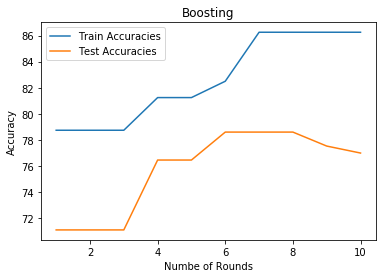

In [13]:
#plot reference : https://www.geeksforgeeks.org/graph-plotting-in-python-set-1/
x1 = []
for i in range(rounds):
    x1.append(i+1)

# plotting the Training accuracies
plt.plot(x1, Train_accuracies, label = "Train Accuracies") 
  
# plotting the Testing accuracies
plt.plot(x1, Test_accuracies, label = "Test Accuracies") 
  
# naming the x axis 
plt.xlabel('Numbe of Rounds') 
# naming the y axis 
plt.ylabel('Accuracy') 
# giving a title to my graph 
plt.title('Boosting') 
  
# show a legend on the plot 
plt.legend() 
  
# function to show the plot 
plt.show() 